<a href="https://colab.research.google.com/github/FaithKare/univariate-bivariate-multivariate-EDA-/blob/master/Faith_Wangari_week2_IP_data_science_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA ANALYTICS QUESTION**


Which factors influenced an individual having a bank account 



### METRIC OF SUCCESS 

The metric of success would be determning which individuals have more bank accounts depending on the type of job they have,the level of eduation, the relationship with head, gender, the access to a cell phone the individual has and type of location

### The context

Financial inclusion is very important in overall economic growth of a country.The data provided is collected over 3 years that is 2016 to 2018 for Kenya, Ugand, Tanzania, Rwanda. The analysis below will be used to determine which factors influence an individual having a bank account while providing insights into some of the key demograohic factors that might drive individuals financial outcomes. 

### Validity

The data contains demographic information an wht financial services are used by individuals across East Africa. The data was exctracted from various Finscope surveys ranging over the three years. It was verifed that the data was sufficent for this analysis by comparing it to the fincope survey links of the specific years provided in the moringa data core LMS content.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
bank = pd.read_csv("Financial Dataset - 1.csv")


**Checking the data**

In [ ]:
#Number of records in the data
bank.shape

(23524, 13)

In [ ]:
#preview of top records
bank.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#preview of bottom of the dataset
bank.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


**DATA CLEANING**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


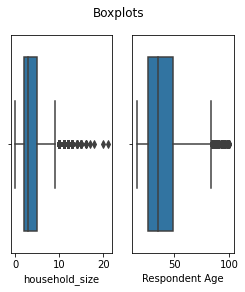

In [ ]:
#Checking for outliers
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(4, 4))
fig.suptitle('Boxplots')
sns.boxplot(bank['household_size'], ax=ax1)
sns.boxplot(bank['Respondent Age'], ax=ax2)
plt.show()


In [ ]:
#checking for anomalies
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3- Q1
IQR


year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64

In [ ]:
#removing anomalies in the data 
bank1= bank[~((bank<(Q1 - 1.5* IQR)) | (bank>(Q3 + 1.5* IQR))).any(axis=1)]
bank1.shape

(22903, 13)

In [ ]:
# checking for missing values in the data
bank1.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [ ]:
#dealing with missing values 
#drop rows with missing values
bank2=bank1.dropna()
bank2.shape

(22725, 13)

### **UNIVARIATE ANALYSIS (EDA)**

In [ ]:
#averge age of the respondents 
bank2["Respondent Age"].mean()

38.34798679867987

In [ ]:
bank2["Respondent Age"].mode()

0    30.0
dtype: float64

In [ ]:
bank2["Respondent Age"].median()

35.0

In [ ]:
bank2["household_size"].mode()

#most hoseholds have a size of 2 

0    2.0
dtype: float64

In [ ]:
#average distance between each quantity and mean age of each respondent
bank2['Respondent Age'].std()

15.806141256107674

In [ ]:
#square of the average distance between each quantity and mean age of each respondent
bank2['Respondent Age'].var()

249.83410140802906

In [ ]:
#getting the skeweness of the respondensts age attribute
bank2['Respondent Age'].skew()

#the distribution is positively skewwed 

0.7402138281724044

In [ ]:
#getting the kurtosis of the respondents age
bank2['Respondent Age'].kurt()

#this is a light tailed playkurtic distribution

-0.23749387799691757

In [ ]:
#getting the quatiles of the respondent age
bank2['Respondent Age'].quantile([0.25,0.5,0.75])

#Q1 o.25 is the median of the upper half of the data
#Q2 0.5 is the median of the whole data
#Q3 0.75 is the median of the lower half of the data 

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

In [ ]:
#getting the range of the respondenets ages
age_max = bank2["Respondent Age"].max()
age_min = bank2["Respondent Age"].min()
age_max - age_min

#the difernce between the highest and lowest age is 67

67.0

Text(0.5, 1.0, 'Indivuals with a Bank Account')

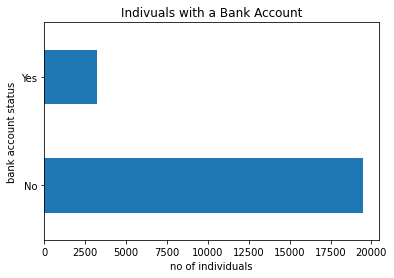

In [ ]:
# bar graph showing the indivivudals with and without a bank account  
bank2['Has a Bank account'].value_counts().plot.barh()
plt.xlabel('no of individuals')
plt.ylabel('bank account status')
plt.title('Indivuals with a Bank Account', fontsize= 12)

#there are more people without bank accounts than those with bank accounts 

Text(0.5, 1.0, 'Indivuals with a Bank Account')

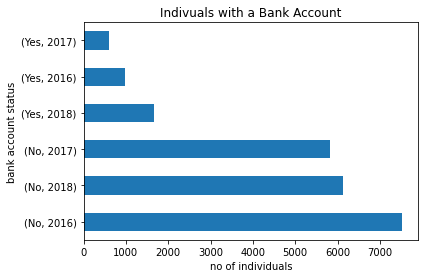

In [ ]:
#bar graph of individuals with a bank account over the years
bank2.groupby(['Has a Bank account'])['year'].value_counts().plot.barh()
plt.xlabel('no of individuals')
plt.ylabel('bank account status')
plt.title('Indivuals with a Bank Account', fontsize= 12)

#2018 had the highest number of indivuals with bank accounts 

Text(0.5, 1.0, 'Histogram of Respondents ages')

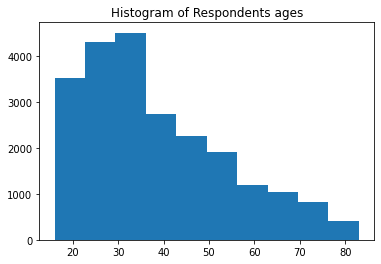

In [ ]:
plt.hist(bank2['Respondent Age'])
plt.title('Histogram of Respondents ages')

# the respondents age is left tailed that is positively skewed the mean is greater than the mode 

Text(0.5, 1.0, 'Distribution of household size')

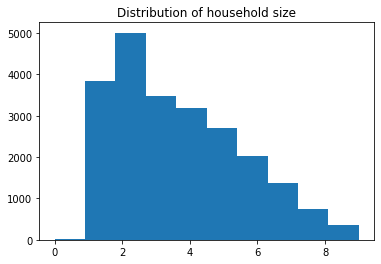

In [ ]:
plt.hist(bank2['household_size'])
plt.title('Distribution of household size')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


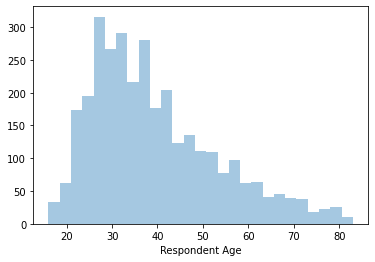

In [ ]:
#histogram of respondents age with a bank account 
yes=bank2[bank2['Has a Bank account'] == 'Yes']
sns.distplot(yes['Respondent Age'],  kde=False,label='Yes')

#individuals with the most bank accounts are aged 30

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


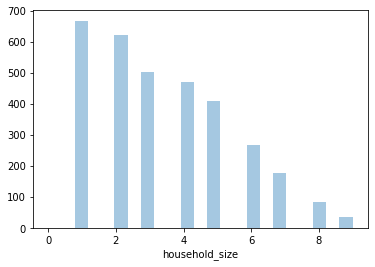

In [ ]:
#histogram of households size with a bank account 
yes = bank2[bank2['Has a Bank account'] == 'Yes']
sns.distplot(yes['household_size'],  kde=False,label='Yes')

#individuas with household size 1 have the highest number of bank accounts 

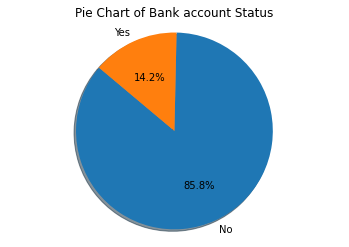

In [ ]:
sum = bank2['Has a Bank account'].value_counts()
status = ['No', 'Yes']
plt.pie(sum, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Bank account Status')
plt.show()

#the perentage of individuls with bank accounts is significantly less than those without bank accounts 

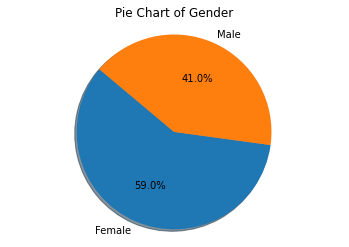

In [ ]:
#pie chart of female and male respondents in the data 

sum = bank2['gender_of_respondent'].value_counts()
gender = ['Female', 'Male']
plt.pie(sum, labels = gender, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Gender')
plt.show()

#there are more females than males

In [ ]:
pd.crosstab(index=bank2['Has a Bank account'],columns=bank2["gender_of_respondent"],margins=True)

# males have more bank accounts than females

gender_of_respondent,Female,Male,All
Has a Bank account,,,
No,11944,7546,19490
Yes,1453,1782,3235
All,13397,9328,22725


In [ ]:
bank2['Type of Location'].value_counts()

#here are more inividuals living in rural areas than in urban areas 

Rural    13810
Urban     8915
Name: Type of Location, dtype: int64

In [ ]:
bank2['Cell Phone Access'].value_counts()

#the data shows there are more people with access to cell phones than those without cell phones

Yes    16985
No      5740
Name: Cell Phone Access, dtype: int64

### Recommendations For Univariate Analysis

From the analysis it is evident that the individuals wthout bank accounts is 85.8% which is a very high percentage indicating that the financial inclusion in Kenya, Uganda, Rwanda and Tanzania is very low. The year 2018 has the most recorded number of people with bank accounts followed by the year 2016 then 2017. The data shows that females population is slighty higher than males at 59.0% and 41.0% respectively and there are more people living in rural areas than in urban areas. Moreover there are more people with cell phone access than those without therefore in order to increase financial inclusion i would recommend financial insititutions to focus on these highly populated areas that is rural areas and the individuals with cell phone access in order to increase financial inclusion and eventually the countrys economic growth inreases. 

### **BIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


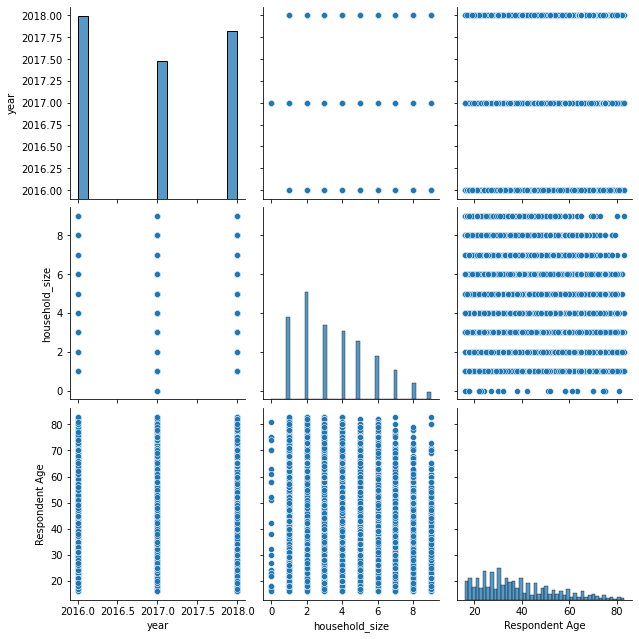

In [ ]:
#plotting bivariate summaries (scatter plots) of the quantitative data  
sns.pairplot(bank2, size=3)
plt.show()

In [ ]:
#pearson correlation co efficient 
bank1.corr()

#respondents age and household size have a negative weak correlation of -0.106239
#The years and household size have a negative  very weak correlation of -0.097401
#The years and respondent age have a negative weak correlaton of -0.024005


,year,household_size,Respondent Age
year,1.000000,-0.097401,-0.024005
household_size,-0.097401,1.000000,-0.106239
Respondent Age,-0.024005,-0.106239,1.000000


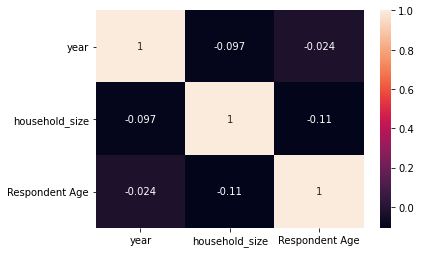

In [ ]:
#a heat map of the pearson correlation 

sns.heatmap(bank1.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'Line graph of individuals with/without bank accounts in rural and urban areas')

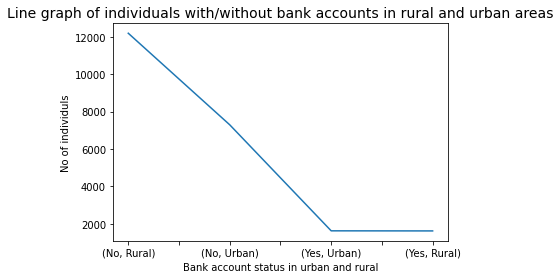

In [ ]:
#Line graph of individuals with/without bank accounts in rural and urban areas

bank2.groupby(['Has a Bank account'])['Type of Location'].value_counts().plot.line()
plt.xlabel('Bank account status in urban and rural')
plt.ylabel('No of individuls')
plt.title('Line graph of individuals with/without bank accounts in rural and urban areas', fontsize= 14)



Text(0.5, 1.0, 'Indivuals with a Bank Account')

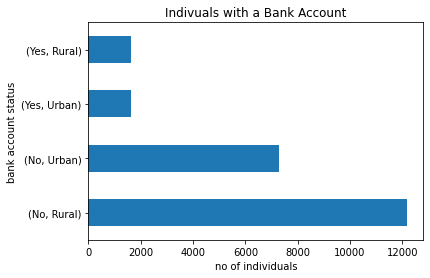

In [ ]:
#bar graph of individuals with a  bank account in rural and urban areas
bank2.groupby(['Has a Bank account'])['Type of Location'].value_counts().plot.barh()
plt.xlabel('no of individuals')
plt.ylabel('bank account status')
plt.title('Indivuals with a Bank Account', fontsize= 12)

# urban areas have a slightly higher number of individuals with bank acoounts than rural areas

Text(0.5, 1.0, 'Bank account status of members of the household')

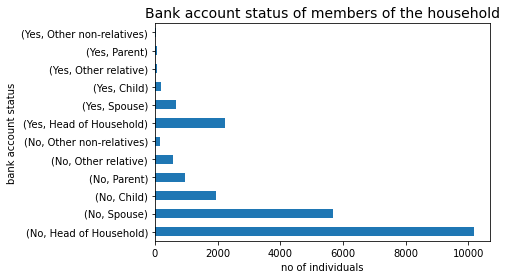

In [ ]:
bank2.groupby(['Has a Bank account'])['The relathip with head'].value_counts().plot.barh()
plt.xlabel('no of individuals')
plt.ylabel('bank account status')
plt.title('Bank account status of members of the household', fontsize= 14)

#the head of the households have more bank accounts than any other member of the household 

Text(0.5, 1.0, 'Marital status Bar Graph of Individuals with/Without Bank accounts')

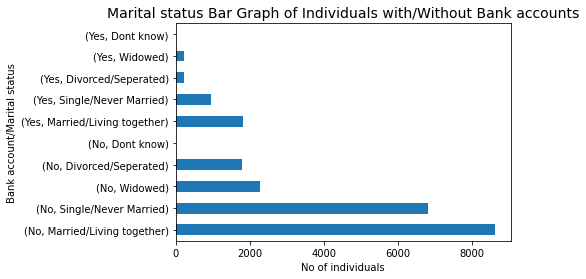

In [ ]:
bank2.groupby(['Has a Bank account'])['marital_status'].value_counts().plot.barh()
plt.xlabel('No of individuals')
plt.ylabel('Bank account/Marital status')
plt.title('Marital status Bar Graph of Individuals with/Without Bank accounts', fontsize= 14)

#individuals who are married and living together have more bank accounts than all other individuals with differnt marital status


Text(0.5, 1.0, 'Level of Education Bar Graph of Individuals with/Without Bank accounts')

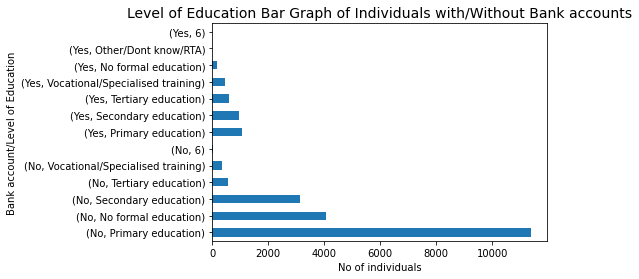

In [ ]:
bank2.groupby(['Has a Bank account'])['Level of Educuation'].value_counts().plot.barh()
plt.xlabel('No of individuals')
plt.ylabel('Bank account/Level of Education')
plt.title('Level of Education Bar Graph of Individuals with/Without Bank accounts', fontsize= 14)

#indivuals with atleast primary level education have the most recorded number of bank accounts 


In [ ]:
pd.crosstab(index=bank2['Has a Bank account'],columns=bank2["Type of Job"],margins=True)

#individuals who are self emlployed have the highest number of people with bank accounts with a count of 835

Type of Job,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,All
Has a Bank account,,,,,,,,,,,
No,104,4676,85,471,168,5052,572,843,2145,5374,19490
Yes,14,620,297,564,41,438,13,183,230,835,3235
All,118,5296,382,1035,209,5490,585,1026,2375,6209,22725


In [ ]:
pd.crosstab(index=bank2['Has a Bank account'],columns=bank2["Cell Phone Access"],margins=True)

# individuals with access to cell phones have more bank accounts than inividuals without access to cell phones 

Cell Phone Access,No,Yes,All
Has a Bank account,,,
No,5647,13843,19490
Yes,93,3142,3235
All,5740,16985,22725


In [ ]:
cellphone = bank2[(bank2['Cell Phone Access'] == 'Yes')]
pd.crosstab(index=cellphone['Has a Bank account'],columns=cellphone["Type of Location"],margins=True)

#individuals with access to cell phones and those living in the urban areas have slighty more bank accounts than people with access to cell phones living in rural areas 

Type of Location,Rural,Urban,All
Has a Bank account,,,
No,9199,4644,13843
Yes,1554,1588,3142
All,10753,6232,16985


### Recommendation for Bivariate Analysis

The analysis gives the following insights and appropriate recommendations are derived from it:
a) Individuals living in urban areas have a slightly higher recorded number of people with bank accounts than people living in rural areas despite their being a higher population in rural than urban areas. As discussed earlier it would be wise to focuss on financial inlusion in rural ares inorder to capture the bigger part of the population t increase economic growth.
b) Individuals with atleast primary level education have the most recorded bank accounts folowed closely by individuals with secondary and tertiary education.
c) The type of job one has is also a factor as self employed people have more bank acounts than any other job and individuals with no income have the least number of bank accounts followed closely by people who are dependent on the government. The farming/fishing job and the informally employed individuals have a high popuation but low count of people with bank accounts. I would therefore reccommend that these types of jobs be considered more while trying to increase the financial inclusion.
d) Married people living together have more bank accounts than all other individuals with differnt marital status while those that are widowed have the least bank accounts. 
e) Moreover the head of the households have more bank acounts than any other memebers of the househols. 
Finally the people with cell phones living in urban areas have a slighlty higher count of bank accounts than people with cell phones living in rural areas. To increase economic growth i would recommend to increase financial inclusion in the rural areas as it has the higher population. 

### **MULTIVARIATE ANALYSIS (REDUCTION)**

In [ ]:
#change variable types to category then encode the categorical data via cat.code accessor
bank2["Cell Phone Access"] = bank2["Cell Phone Access"].astype('category')
bank2["Cell Phone Access"] = bank2["Cell Phone Access"].cat.codes

bank2["gender_of_respondent"] = bank2["gender_of_respondent"].astype('category')
bank2["gender_of_respondent"] = bank2["gender_of_respondent"].cat.codes

bank2["Type of Location"] = bank2["Type of Location"].astype('category')
bank2["Type of Location"] = bank2["Type of Location"].cat.codes

bank2["Type of Job"] = bank2["Type of Job"].astype('category')
bank2["Type of Job"] = bank2["Type of Job"].cat.codes

bank2["Level of Educuation"] = bank2["Level of Educuation"].astype('category')
bank2["Level of Educuation"] = bank2["Level of Educuation"].cat.codes

bank2["marital_status"] = bank2["marital_status"].astype('category')
bank2["marital_status"] = bank2["marital_status"].cat.codes

bank2["The relathip with head"] = bank2["The relathip with head"].astype('category')
bank2["The relathip with head"] = bank2["The relathip with head"].cat.codes

bank2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,4,9
1,Kenya,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,1,4
2,Kenya,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,6,9
3,Kenya,2018,uniqueid_4,No,0,1,5.0,34.0,0,1,2,3,3
4,Kenya,2018,uniqueid_5,No,1,0,8.0,26.0,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,0,0,2.0,57.0,0,1,0,1,7
23519,Uganda,2018,uniqueid_2113,No,0,1,4.0,48.0,0,1,0,1,7
23520,Uganda,2018,uniqueid_2114,No,0,1,2.0,27.0,0,1,3,4,7
23521,Uganda,2018,uniqueid_2115,No,0,1,5.0,27.0,0,4,4,3,7


In [ ]:
bank3 = bank2.drop(['country','year','uniqueid','household_size','Respondent Age'], axis =1)
bank3.head()

,Has a Bank account,Type of Location,Cell Phone Access,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Yes,0,1,0,5,2,4,9
1,No,0,0,0,1,4,1,4
2,Yes,1,1,1,3,3,6,9
3,No,0,1,0,1,2,3,3
4,No,1,0,1,0,3,3,5


In [ ]:
#divide the daatset into feature and corresponding lables 
# the column has a  bank acount will be the feature set in y and the rest of the variabes will be the corresponding lables in x

X = bank3.drop('Has a Bank account', 1)
y = bank3['Has a Bank account']

In [ ]:
#then split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
 #performing PCA using Python's Scikit-Learn library.
 #Call the fit and then transform methods by passing the feature set to these methods. 
 #all seven of the features in the feature set will be returned for both the training and test sets.


from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#variance caused by each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance

#the first principal coponent is responsible for 59.1% variance
#the second principal coponent is responsible for 22.5% variance
#the third principal coponent is responsible for 9.2% variance
#the fourth principal coponent is responsible for 1.2% variance
#first an second principle components are responsible for 
#85.4% percent of the classification information contained in the feature set is captured by the first two principal components.


array([0.59185757, 0.22546104, 0.092219  , 0.05701685, 0.01260294,
       0.01104778, 0.00979481])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[3764  132]
 [ 469  180]]
Accuracy 0.8677667766776678


### Recommenations for Multivariate Analysis

 From the results we can see that the accuracy achieved with principal component is 86.6% .
 we therfore take principal components that contribute to significant variance and ignore those with diminishing variance returns that is principal component 1



### **CHALLENGING THE SOLUTION**

The solutons given from the  univariate and bivariate analysis can be imporved by analysing data for different years and different countries separatley to get better insights for the specific countries. Moreover the variables can be grouped further for example head of households who have a certain level of education and the type of job they have could be analysed to see how this factors grouped together affect an individual having a bank account.   
Multivariate analysis could be done using other techniques that is factor analyis. 
Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.There are broadly two kinds of factor analysis, Exploratory Factor Analysis (EFA) and Confirmatory Factor Analysis (CFA).  In this set of data EFA would be the better technique.EFA is where the variables that are highly correlated to each other are grouped. This group is known as a ‘factor’. Once this factor is created, it looks for another set of variables and groups them, making another factor. The number of factors that are to be created depends on the analyst and N (number of observed variables) number of factors can be created (i.e. one factor for each observed variable). This N number is decided based on a number of factors.